## Red Wine Quality Prediction

Problem Statement:
The dataset is related to red and white variants of the Portuguese "Vinho Verde" wine. Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

This dataset can be viewed as classification task. The classes are ordered and not balanced (e.g. there are many more normal wines than excellent or poor ones). Also, we are not sure if all input variables are relevant. So it could be interesting to test feature selection methods.

Attribute Information

Input variables (based on physicochemical tests):
1 - fixed acidity
2 - volatile acidity
3 - citric acid
4 - residual sugar
5 - chlorides
6 - free sulfur dioxide
7 - total sulfur dioxide
8 - density
9 - pH
10 - sulphates
11 - alcohol
Output variable (based on sensory data):
12 - quality (score between 0 and 10)

we are using Red Wine Quality dataset to build various classification models to predict whether a particular red wine is “good quality” or not. Each wine in this dataset is given a “quality” score between 0 and 10. For the purpose of this project,  each wine is either “good quality” (a score of 7 or higher) or not (a score below 7).
This allows you to practice with hyper parameter tuning on e.g. decision tree algorithms looking at the ROC curve and the AUC value.

We need to build a classification model. 


In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/winequality-red.csv", error_bad_lines=False)
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
df.shape 

(1599, 12)

# EDA

## Lets try to analyze the target

In [4]:
df['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [5]:
df.quality.value_counts().sort_index()

3     10
4     53
5    681
6    638
7    199
8     18
Name: quality, dtype: int64

<AxesSubplot:xlabel='quality', ylabel='count'>

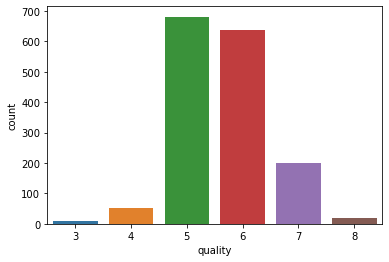

In [6]:
sns.countplot(x='quality', data=df)

#### above graph shows range of quality is between 3 to 8.

In [7]:
#Dividing our quality column into good and bad (1 and 0) , based on the quality points given in dataset (0 to 10)

conditions = [
    (df['quality'] >= 7),  #given in the problem statement >=7 is 'good' quality , (good means 1)
    (df['quality'] < 7)    # <7 is taken as 'not good' quality , (not good means 0)
]
wine_quality = [1, 0]
df['wine_quality'] = np.select(conditions, wine_quality)
df['wine_quality'].value_counts()

0    1382
1     217
Name: wine_quality, dtype: int64

In [8]:
#Checking average values of all columns for good quality, and bad quality.

df.groupby('wine_quality').mean()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
wine_quality,,,,,,,,,,,,
0,8.236831,0.547022,0.254407,2.512120,0.089281,16.172214,48.285818,0.996859,3.314616,0.644754,10.251037,5.408828
1,8.847005,0.405530,0.376498,2.708756,0.075912,13.981567,34.889401,0.996030,3.288802,0.743456,11.518049,7.082949


In [9]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,wine_quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,0
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,0
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,0


In [10]:
df.dtypes   #Checking the datatypes of the columns numeric or not.

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
wine_quality              int32
dtype: object

Since 'wine_quality' is derived from 'quality', both columns speak same story, We will delete 'quality'.and keep 'wine_quality' which only has values 0 and 1 for better classification. So that, 'wine_quality' is our label now.

In [11]:
df = df.drop("quality",axis = 1)
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,wine_quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,0
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,0
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,0


#### Now wine_quality is our label now, with values 0 and 1. Its a binary classification.

In [12]:
df.shape

(1599, 12)

# Statistical summary:

In [13]:
df.describe() 

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,wine_quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,0.135710
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.342587
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,0.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,0.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,0.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,0.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,1.000000


<AxesSubplot:>

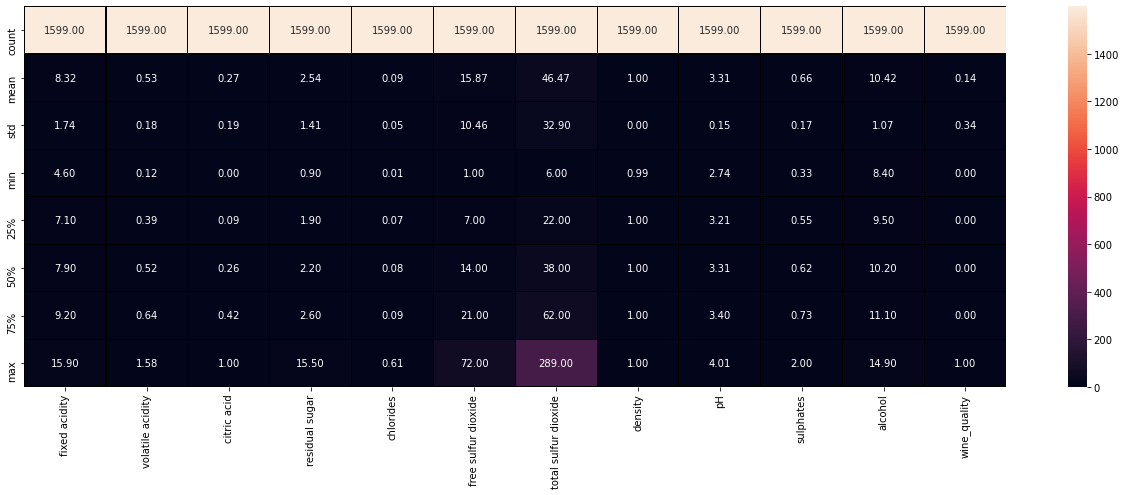

In [14]:
#Heatmap using df.describe

import matplotlib.pyplot as plt
plt.figure(figsize=(22,7))
sns.heatmap(df.describe(), annot=True, linewidths=0.1, linecolor='black',fmt=".2f")

# Checking for nulls

In [15]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
wine_quality            0
dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

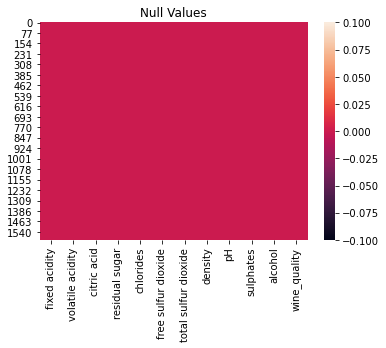

In [16]:
sns.heatmap(df.isnull())
plt.title("Null Values")
plt.show

### There are no null values in the dataset.

# Checking the distribution of the continuous values of the float type

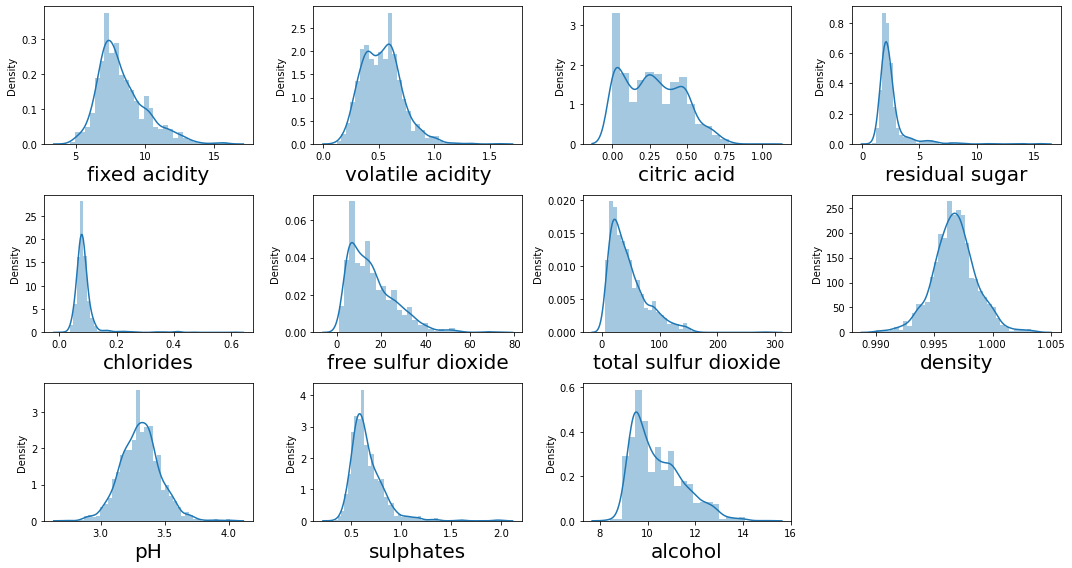

In [17]:
#Data distribution:
#Dist Plot:

plt.figure(figsize = (15,8), facecolor = 'white')
plotnumber = 1   #initializing 1 to a name

for column in df:
    if plotnumber <= 11:
        ax = plt.subplot(3,4,plotnumber) #In 3 rows I want 4 columns to be plotted 
        sns.distplot(df[column])
        plt.xlabel(column,fontsize = 20)
        plotnumber += 1
        plt.tight_layout()
        

#### Observation: Most of the features are skewed.

# checking for class imbalance

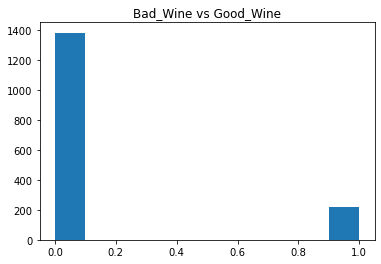

In [18]:
#Lets check if there is class imbalance

df["wine_quality"].hist(grid = False)
plt.title("Bad_Wine vs Good_Wine")
plt.show()

### We will deal with the imbalance later after training the model.

# correlation

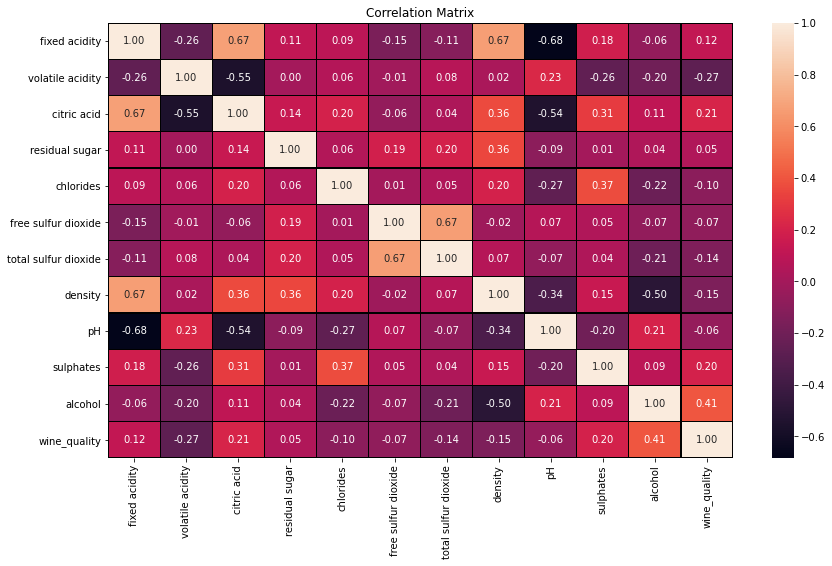

In [19]:
correlation = df.corr()
plt.figure(figsize=(14, 8))
sns.heatmap(correlation, annot=True, linewidths=0.1, linecolor='black', fmt="0.2f")
plt.title("Correlation Matrix")
plt.show()

## Outcome of Correlation;
#### Fixed acidity has 12 percent corr. with the target column which can be considered as a Weak bond. volatile acidity has 27 percent corr. with the target column which can be considered as a Strong bond. Citric acid has 21 percent corr. with the target column which can be considered as a Good bond. Residual sugar has 5 percent corr. with the target column which can be considered as a Weak Bond. chlorides has 10 percent corr. with the target column which can be considered as a Weak bond. free sulfur dioxide has 7 percent corr. with the target column which can be considered as a Weak bond. Total Sulfur dioxide has 14 percent corr. with the target column which can be considered as a Weak bond. Density has 15 percent corr. with the target column which can be considered as a Good bond. PH has 6 percent corr. with the target column which can be considered as a Weak bond. Sulphates has 20 percent corr. with the target column which can be considered as a Good Bond. Alcohal has 41 percent corr. with the target column which can be considered as a Strong bond.


<AxesSubplot:>

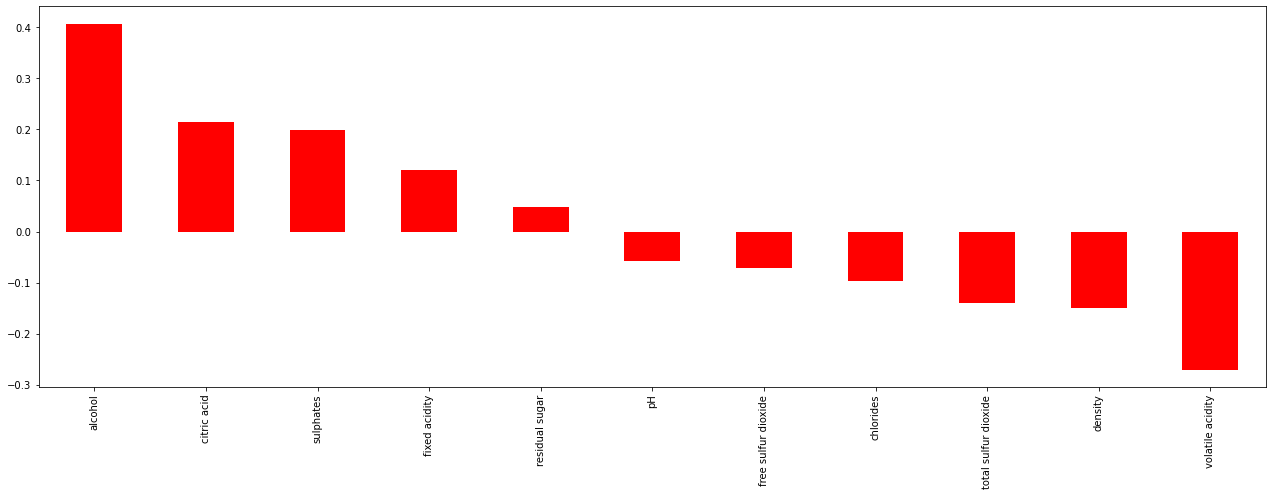

In [20]:
plt.figure(figsize=(22,7))
correlation['wine_quality'].sort_values(ascending=False).drop(['wine_quality']).plot(kind='bar',color='r')

In [21]:
correlation['wine_quality'].sort_values(ascending=False)

wine_quality            1.000000
alcohol                 0.407315
citric acid             0.214716
sulphates               0.199485
fixed acidity           0.120061
residual sugar          0.047779
pH                     -0.057283
free sulfur dioxide    -0.071747
chlorides              -0.097308
total sulfur dioxide   -0.139517
density                -0.150460
volatile acidity       -0.270712
Name: wine_quality, dtype: float64

#### Observation: Min Correlation: residual sugar ; Max Correlation: alcohol

# lets divide data into features and label

In [22]:
x = df.drop("wine_quality",axis = 1)
y = df["wine_quality"]
x

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


# skewness

In [23]:
x.skew()

fixed acidity           0.982751
volatile acidity        0.671593
citric acid             0.318337
residual sugar          4.540655
chlorides               5.680347
free sulfur dioxide     1.250567
total sulfur dioxide    1.515531
density                 0.071288
pH                      0.193683
sulphates               2.428672
alcohol                 0.860829
dtype: float64

# power_tranform function

In [24]:
# we will remove the skewness using power_tranform function
from sklearn.preprocessing import power_transform
x_new = power_transform(x ,  method = 'yeo-johnson')
x = pd.DataFrame(x_new,columns=x.columns)


In [25]:
x.skew()

fixed acidity           0.002529
volatile acidity        0.003099
citric acid             0.017788
residual sugar         -0.015715
chlorides              -0.151304
free sulfur dioxide    -0.009948
total sulfur dioxide   -0.003752
density                -0.005054
pH                     -0.002823
sulphates               0.009985
alcohol                 0.112372
dtype: float64

### All values are under +/-0.5, skewness is handled.

## Checking outliers: 

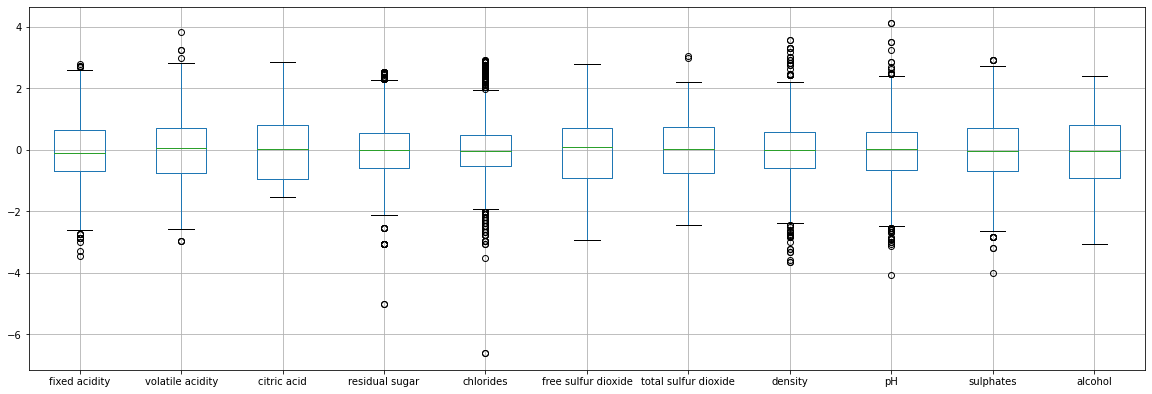

In [26]:
# plotting boxplot for all the columns
x.iloc[:,0:11].boxplot(figsize=[20,8])
plt.subplots_adjust(bottom=0.25)
plt.show()

# Outliers Removal

## ZScore Technique:

In [27]:
from scipy.stats import zscore
import numpy as np 
z=np.abs(zscore(x))
z.shape

(1599, 11)

In [28]:
threshold=3
print(np.where(z>3))

(array([   7,   45,   45,   95,   95,  126,  127,  151,  170,  198,  354,
        442,  469,  480,  517,  544,  544,  554,  555,  557,  608,  614,
        695,  695,  797,  836,  836,  837,  837,  889,  909,  914, 1017,
       1017, 1018, 1018, 1081, 1114, 1269, 1270, 1287, 1299, 1316, 1316,
       1321, 1321, 1369, 1374, 1434, 1435, 1571], dtype=int64), array([ 3,  0,  8,  0,  8,  1,  1,  8,  9,  3,  7,  7,  3,  7, 10,  8, 10,
        7,  7,  7,  7,  8,  4,  8,  4,  4,  7,  4,  7,  7,  3,  3,  3,  7,
        3,  7,  6,  7,  7,  7,  9,  1,  3,  8,  3,  8,  9,  3,  7,  7,  4],
      dtype=int64))


In [29]:
df_new=x[(z<3).all(axis=1)]
print(x.shape)
print(df_new.shape)

(1599, 11)
(1558, 11)


In [30]:
## Percentage data loss: 
loss_percent=(1599-1558)/1599*100
print(loss_percent)

2.564102564102564


##### Data loss is in the acceptable range , good to proceed.

# Finding Best Random_state:

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split


In [32]:
lr = LogisticRegression()

In [33]:
for i in range (0,1000):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=i)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    if round(accuracy_score(y_train,pred_train)*100,1)==round(accuracy_score(y_test,pred_test)*100,1):
        print(f"At random state {i}, The model performs very well")
        
        print(f"At random state {i}, the training accuracy is:- {accuracy_score(y_train,pred_train)*100}")
        print(f"At random state {i}, the testing accuracy is:- {accuracy_score(y_test,pred_test)*100}")
        print("\n")


At random state 96, The model performs very well
At random state 96, the training accuracy is:- 88.42845973416732
At random state 96, the testing accuracy is:- 88.4375


At random state 97, The model performs very well
At random state 97, the training accuracy is:- 88.42845973416732
At random state 97, the testing accuracy is:- 88.4375


At random state 99, The model performs very well
At random state 99, the training accuracy is:- 88.35027365129007
At random state 99, the testing accuracy is:- 88.4375


At random state 134, The model performs very well
At random state 134, the training accuracy is:- 88.35027365129007
At random state 134, the testing accuracy is:- 88.4375


At random state 188, The model performs very well
At random state 188, the training accuracy is:- 88.35027365129007
At random state 188, the testing accuracy is:- 88.4375


At random state 231, The model performs very well
At random state 231, the training accuracy is:- 88.35027365129007
At random state 231, the tes

##### Best training accuracy is 88.42%, best testing accuracy is 88.43% on Random_state 96.

## Creating Train-Test-split

In [34]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = .20, random_state = 96)

In [35]:
print('Training wine_quality - \n', y_train.value_counts())

Training wine_quality - 
 0    1102
1     177
Name: wine_quality, dtype: int64


## Logistic Regression

In [36]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(x_train, y_train)
predlr = LR.predict(x_test)
print("Accuracy",accuracy_score(y_test, predlr)*100)
print(confusion_matrix(y_test,predlr))
print(classification_report(y_test,predlr))

Accuracy 88.4375
[[272   8]
 [ 29  11]]
              precision    recall  f1-score   support

           0       0.90      0.97      0.94       280
           1       0.58      0.28      0.37        40

    accuracy                           0.88       320
   macro avg       0.74      0.62      0.65       320
weighted avg       0.86      0.88      0.87       320



##### for Logistic Regression, from above Confusion matrix,  TN = 272, FP = 8, FN = 29, TP = 11.  accuracy = 88%.

## Decision Tree Classifier

In [37]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)
preddt = dt.predict(x_test)
print("Accuracy",accuracy_score(y_test, preddt)*100)
print(confusion_matrix(y_test,preddt))
print(classification_report(y_test,preddt))

Accuracy 90.9375
[[269  11]
 [ 18  22]]
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       280
           1       0.67      0.55      0.60        40

    accuracy                           0.91       320
   macro avg       0.80      0.76      0.78       320
weighted avg       0.90      0.91      0.91       320



##### for Decision Tree Classifier, from above Confusion matrix,  TN = 269, FP = 11, FN = 18, TP = 22.  accuracy = 91%.

## Random Forest Classifier

In [38]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(x_train, y_train)
predrf = dt.predict(x_test)
print("Accuracy",accuracy_score(y_test, predrf)*100)
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

Accuracy 90.9375
[[269  11]
 [ 18  22]]
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       280
           1       0.67      0.55      0.60        40

    accuracy                           0.91       320
   macro avg       0.80      0.76      0.78       320
weighted avg       0.90      0.91      0.91       320



##### for Random Forest Classifier, from above Confusion matrix, TN = 269, FP = 11, FN = 18, TP = 22. accuracy = 91%.¶

# SVM

In [39]:
from sklearn.svm import SVC

svc = SVC()
svc.fit( x_train, y_train)

ad_pred = svc.predict(x_test)
print("Acuuracy", accuracy_score(y_test, ad_pred)*100)
print(confusion_matrix(y_test,ad_pred))
print(classification_report(y_test,ad_pred))

Acuuracy 88.125
[[273   7]
 [ 31   9]]
              precision    recall  f1-score   support

           0       0.90      0.97      0.93       280
           1       0.56      0.23      0.32        40

    accuracy                           0.88       320
   macro avg       0.73      0.60      0.63       320
weighted avg       0.86      0.88      0.86       320



##### for SVM, from above Confusion matrix, TN = 273, FP = 7, FN = 31, TP = 9. accuracy = 88%.¶

Lets check the CV scores for the above models, for overfitting.

## Cross Validation

In [50]:
from sklearn.model_selection import cross_val_score

scr=cross_val_score(LR, x, y, cv=5)
print("Cross Validation score of LR model:", scr.mean())

Cross Validation score of LR model: 0.8699294670846396


In [51]:
scr=cross_val_score(dt, x, y, cv=5)
print("Cross Validation score of DT model:", scr.mean())

Cross Validation score of DT model: 0.8029996081504702


In [52]:
scr=cross_val_score(rf, x, y, cv=5)
print("Cross Validation score of rf model:", scr.mean())

Cross Validation score of rf model: 0.866792711598746


In [53]:
scr=cross_val_score(svc, x, y, cv=5)
print("Cross Validation score of SVC model:", scr.mean())

Cross Validation score of SVC model: 0.8611677115987462


##### Considering good CV score, Logistic Regression is performing better among all, we go ahead with Logistic Regression.

## Hyper Parameter Tuning

In [54]:
from sklearn.model_selection import GridSearchCV

## Creating parameter list to pass in GridsearchCV
parameters = { "multi_class":['auto', 'ovr', 'multinomial'], "solver":['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'], 
              "penalty" :['l1', 'l2', 'elasticnet', 'none']}


In [55]:
GCV=GridSearchCV(LogisticRegression(),parameters,cv=5,scoring="accuracy")
GCV.fit(x_train,y_train) # Fitting the data in model
GCV.best_params_  # Printing the best parameter found by GridSearchCV

{'multi_class': 'auto', 'penalty': 'l2', 'solver': 'newton-cg'}

In [56]:
GCV_pred=GCV.best_estimator_.predict(x_test) # Prediciting with the best parameters
accuracy_score(y_test,GCV_pred) # Checking final accuracy

0.884375

#### Accuracy of LogisticRegression after Hyper parameter tuning is 88%. 

## ROC AUC Plot

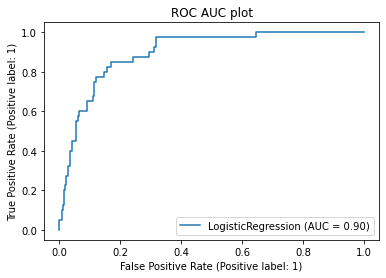

In [57]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(GCV.best_estimator_,x_test,y_test)
plt.title("ROC AUC plot")
plt.show()

##### Final Accuracy is 88% & AUC score is 87%. which is good.

## Saving the model in Pickle format

In [58]:
import pickle
filename = 'RedWine_project.pkl'
pickle.dump(rf, open(filename, 'wb'))

## Conclusion

In [59]:
import numpy as np
a= np.array(y_test)
predicted=np.array(rf.predict(x_test))
df_com = pd.DataFrame({"Original":a,"Predicted":predicted }, index=range(len(a)))
df_com

,Original,Predicted
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
315,0,0
316,0,0
317,0,0
318,0,0


##### We can visualize there is no error in the wine_quality prediction using the above model.

### Our Model is good in distinguishing Good Quality Wine & Bad Quality Wine.